<a href="https://colab.research.google.com/github/kaybrian/Tensorflow_self_study/blob/main/Libraries_for_Neural_Networks_Pybrain_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries for Neural Networks - Pybrain 2

In [ ]:
!pip install https://github.com/pybrain/pybrain/archive/0.3.3.zip

     \ 6.5MB 4.0MB/s
  Created wheel for PyBrain: filename=PyBrain-0.3.1-cp36-none-any.whl size=468232 sha256=988b424475a7b96d372da9fad36ede91a18d6805612e3b1a1721fedeb4dc11b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-sb5rk7m8/wheels/0b/04/38/2f174aa3c578350870947ca6ab12e0eb89aef3478c9610eb0a
Successfully built PyBrain


In [ ]:
import pybrain

In [ ]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised import BackpropTrainer
from pybrain.structure.modules import SigmoidLayer

In [ ]:
network = buildNetwork(2, 3, 1, outclass = SigmoidLayer, hiddenclass = SigmoidLayer, bias = False)

In [ ]:
network

<FeedForwardNetwork 'FeedForwardNetwork-8'>

In [ ]:
network['in']

<LinearLayer 'in'>

In [ ]:
network['hidden0']

<SigmoidLayer 'hidden0'>

In [ ]:
network['out']

<SigmoidLayer 'out'>

In [ ]:
network['bias']

In [ ]:
dataset = SupervisedDataSet(2, 1)
dataset.addSample((0,0), (0,))
dataset.addSample((0,1), (1,))
dataset.addSample((1,0), (1,))
dataset.addSample((1,1), (0,))

In [ ]:
dataset['input']

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [ ]:
dataset['target']

array([[0.],
       [1.],
       [1.],
       [0.]])

In [ ]:
optimizer = BackpropTrainer(module=network, dataset=dataset, learningrate=0.5)

In [ ]:
epochs = 30000
error = []
for epoch in range(epochs):
  error_average = optimizer.train()
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(error_average))
    error.append(error_average)

Epoch: 1 Error: 0.06668661184965809
Epoch: 1001 Error: 0.06669023514753844
Epoch: 2001 Error: 0.0666731772860656
Epoch: 3001 Error: 0.06666784749155985
Epoch: 4001 Error: 0.06665545451434077
Epoch: 5001 Error: 0.0666507400006464
Epoch: 6001 Error: 0.06664437226437642
Epoch: 7001 Error: 0.06664266160242513
Epoch: 8001 Error: 0.06663712608900237
Epoch: 9001 Error: 0.06663126979546966
Epoch: 10001 Error: 0.06663329093004937
Epoch: 11001 Error: 0.06662239568997567
Epoch: 12001 Error: 0.06662869582007004
Epoch: 13001 Error: 0.06662036831741402
Epoch: 14001 Error: 0.06661604874354891
Epoch: 15001 Error: 0.066609402772548
Epoch: 16001 Error: 0.06660761123354142
Epoch: 17001 Error: 0.06660588705919038
Epoch: 18001 Error: 0.0666021806089894
Epoch: 19001 Error: 0.06660150280023854
Epoch: 20001 Error: 0.06659814047392755
Epoch: 21001 Error: 0.06659654085294815
Epoch: 22001 Error: 0.06659703750274448
Epoch: 23001 Error: 0.06660136262027974
Epoch: 24001 Error: 0.06661077297706489
Epoch: 25001 Error

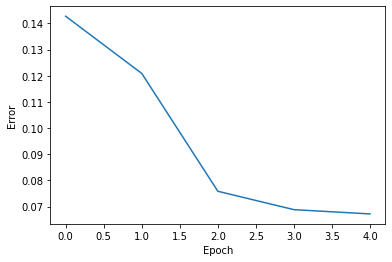

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(error)

In [ ]:
network.params

array([-6.31138407, -3.1615783 ,  6.21928154, -0.71029957,  6.38630972,
        3.94120457, -5.61594203, -4.85749822,  4.85361949])

In [ ]:
network.activate([0,0])

array([0.05679098])

In [ ]:
network.activate([0,1])

array([0.94941608])

In [ ]:
network.activate([1,0])

array([0.49685814])

In [ ]:
network.activate([1,1])

array([0.50378123])